Epoch 0, Loss: 0.09269596771550816
Epoch 1000, Loss: 0.05911149771614866
Epoch 2000, Loss: 0.04893494095177344
Epoch 3000, Loss: 0.034798698630538236
Epoch 4000, Loss: 0.020667915248525896
Epoch 5000, Loss: 0.009866339966421153
Epoch 6000, Loss: 0.007867263378904208
Epoch 7000, Loss: 0.006712292119961269
Epoch 8000, Loss: 0.005957606742185706
Epoch 9000, Loss: 0.0054220790013883935


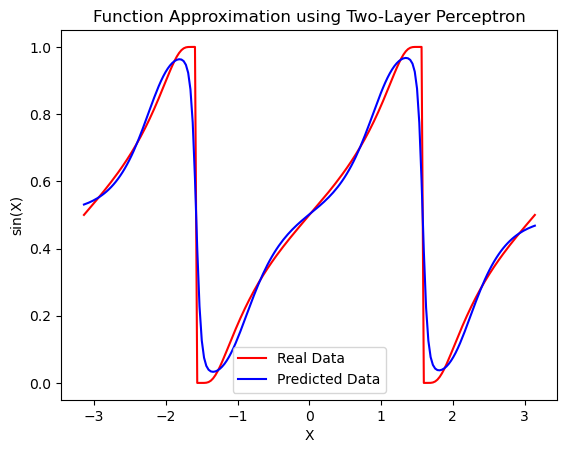

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Initialize network parameters
input_size = 1       # Input layer: 1 neuron (one feature x)
hidden_size = 5     # Hidden layer: 10 neurons
output_size = 1      # Output layer: 1 neuron (function value)

# Training data
X = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)  # Input values
y = np.exp(np.tan(X))/(1+np.exp(np.tan(X)))                               # Target values

# Weights and biases initialization
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

learning_rate = 0.05
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Loss calculation
    loss = mse_loss(y, predicted_output)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plotting the results
plt.plot(X, y, color='red', label='Real Data')
plt.plot(X, predicted_output, color='blue', label='Predicted Data')
plt.title('Function Approximation using Two-Layer Perceptron')
plt.xlabel('X')
plt.ylabel('sin(X)')
plt.legend()
plt.show()

In [108]:
print(weights_input_hidden)
print(weights_hidden_output)
print(bias_output)
print(bias_hidden)

[[11.74040665 -1.97928609 11.92811969  3.04546005  3.13727025]]
[[-12.35472166]
 [ -0.8871624 ]
 [-12.17498152]
 [ 12.07627195]
 [ 11.51696632]]
[[0.90780354]]
[[ 18.50540723  -2.25642788 -18.78989171  -4.77710937   4.97393775]]
